In [1]:
# Import libraries
import pandas as pd
from scipy import io
import scanpy as sc

# Path to the folder where GEO files 
base = "."  

# Read in the matrix
print("Reading matrix...")
mat = io.mmread(f"{base}/GSE211644_fresh_matrix.mtx.gz").T.tocsr()

print("Reading gene and barcode lists...")
genes = pd.read_csv(f"{base}/GSE211644_fresh_genes.tsv.gz", sep="\t", header=None)
barcodes = pd.read_csv(f"{base}/GSE211644_fresh_barcodes.tsv.gz", sep="\t", header=None)

# Create AnnData object
print("Creating AnnData object...")
adata = sc.AnnData(X=mat)
adata.obs_names = barcodes.iloc[:, 0].astype(str).values   # cells
adata.var_names = genes.iloc[:, 0].astype(str).values      # genes

# Read metadata
print("Reading metadata...")
meta = pd.read_csv(f"{base}/GSE211644_fresh_metadata.csv.gz")

# Extract sample name from barcode prefix
meta["sample"] = meta["barcode"].str.split("_").str[0]

# Make sure metadata aligns with AnnData cells
meta.index = meta["barcode"]
adata.obs = meta.reindex(adata.obs_names)

# Inspect what samples exist 
print("Unique samples found in metadata:")
print(meta["sample"].unique())

# Subset for MDA1 and MDA2
adata_MDA1 = adata[adata.obs["sample"] == "MDA1"].copy()
adata_MDA2 = adata[adata.obs["sample"] == "MDA2"].copy()

print(f"MDA1 cells: {adata_MDA1.n_obs}, genes: {adata_MDA1.n_vars}")
print(f"MDA2 cells: {adata_MDA2.n_obs}, genes: {adata_MDA2.n_vars}")
print("Done!")


Reading matrix...
Reading gene and barcode lists...
Creating AnnData object...
Reading metadata...
Unique samples found in metadata:
['MDA1' 'MDA2']
MDA1 cells: 3145, genes: 33538
MDA2 cells: 19019, genes: 33538
Done!


In [2]:
# Count cells per sample
sample_counts = adata.obs['sample'].value_counts()

# Display the summary
print("Cell counts per sample:")
print(sample_counts)

Cell counts per sample:
sample
MDA2    19019
MDA1     3145
Name: count, dtype: int64


In [3]:
meta = pd.read_csv(f"{base}/GSE211644_fresh_metadata.csv.gz")
print(meta.shape)
print(meta.columns)
meta.head()


(22164, 2)
Index(['barcode', 'cluster'], dtype='object')


,barcode,cluster
0,MDA1_T02_AAAGTAGTCTCTTGAT,CD4 - FOXP3
1,MDA1_T02_ACACCGGTCGCGATCG,CD4 - FOXP3
2,MDA1_T02_TAAACCGCAGTCAGAG,CD4 - FOXP3
3,MDA1_T04_AAACGGGTCTCGATGA,CD4 - FOXP3
4,MDA1_T04_AACCATGGTAGCAAAT,CD4 - FOXP3


In [4]:
print(genes.shape)
print(genes.columns)
genes.head()

(33538, 2)
Index([0, 1], dtype='int64')


,0,1
0,MIR1302-2HG,MIR1302-2HG
1,FAM138A,FAM138A
2,OR4F5,OR4F5
3,AL627309.1,AL627309.1
4,AL627309.3,AL627309.3


In [5]:
print(barcodes.shape)
print(barcodes.columns)
barcodes.head()

(22164, 1)
Index([0], dtype='int64')


,0
0,MDA1_T02_AAAGTAGTCTCTTGAT
1,MDA1_T02_ACACCGGTCGCGATCG
2,MDA1_T02_TAAACCGCAGTCAGAG
3,MDA1_T04_AAACGGGTCTCGATGA
4,MDA1_T04_AACCATGGTAGCAAAT


In [6]:
# Total counts (UMIs) per cell
adata_MDA1.obs['n_counts'] = adata_MDA1.X.sum(axis=1)
adata_MDA2.obs['n_counts'] = adata_MDA2.X.sum(axis=1)

# Number of genes expressed per cell
adata_MDA1.obs['n_genes'] = (adata_MDA1.X > 0).sum(axis=1)
adata_MDA2.obs['n_genes'] = (adata_MDA2.X > 0).sum(axis=1)

# Quick summary
print(adata_MDA1.obs[['n_counts','n_genes']].describe())
print(adata_MDA2.obs[['n_counts','n_genes']].describe())

           n_counts      n_genes
count   3145.000000  3145.000000
mean    1977.563752   848.327504
std     1846.210232   507.160853
min      460.000000   207.000000
25%      802.000000   457.000000
50%     1583.000000   750.000000
75%     2569.000000  1072.000000
max    35426.000000  5825.000000
           n_counts       n_genes
count  19019.000000  19019.000000
mean    2144.298806    836.756454
std     1113.985102    299.502081
min      500.000000    201.000000
25%     1490.000000    660.000000
50%     1995.000000    814.000000
75%     2596.000000    968.000000
max    34524.000000   5083.000000


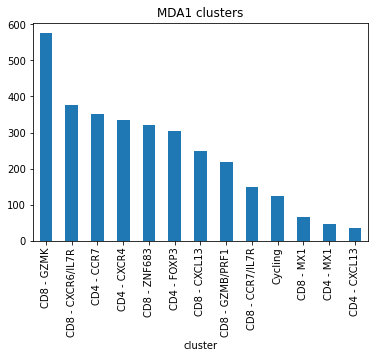

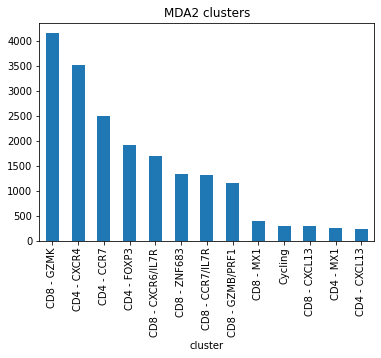

In [7]:
import matplotlib.pyplot as plt

# Bar plot of clusters
adata_MDA1.obs['cluster'].value_counts().plot(kind='bar', title='MDA1 clusters')
plt.show()

adata_MDA2.obs['cluster'].value_counts().plot(kind='bar', title='MDA2 clusters')
plt.show()


/Users/bee/opt/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


2000 highly variable genes found


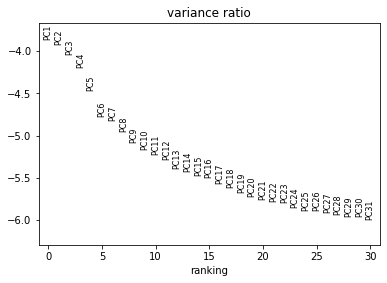

/Users/bee/opt/anaconda3/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/bee/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/bee/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


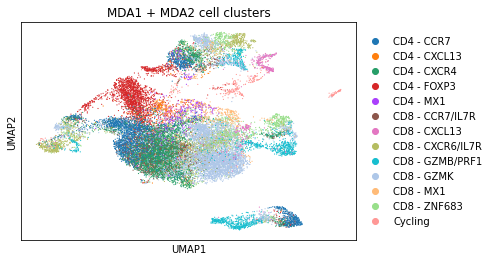

In [10]:
import scanpy as sc

# Normalize total counts per cell
sc.pp.normalize_total(adata, target_sum=1e4)  # scale counts so total = 10,000 per cell

# Logarithmize
sc.pp.log1p(adata)  # log(x+1) transformation

# Identify highly variable genes HVGs: HVGs capture most of the biological signal.
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=2000)
print(adata.var['highly_variable'].sum(), "highly variable genes found")

# Filter down to HVGs for PCA
adata_hvg = adata[:, adata.var['highly_variable']].copy()

# Scale the data
sc.pp.scale(adata_hvg, max_value=10)

# PCA
sc.tl.pca(adata_hvg, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_hvg, log=True, show=True)

# Neighborhood Graph
sc.pp.neighbors(adata_hvg, n_neighbors=15, n_pcs=30)  # adjust PCs as needed

# UMAP
sc.tl.umap(adata_hvg)
sc.pl.umap(adata_hvg, color=['cluster'], title='MDA1 + MDA2 cell clusters')


/Users/bee/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/bee/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


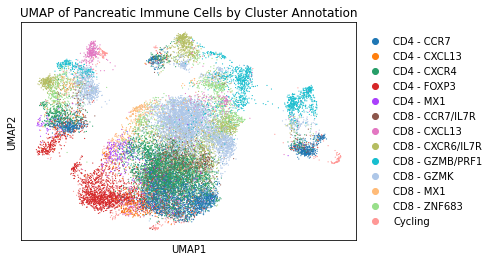

In [14]:
# UMAP without filtering for highly variable genes

sc.pp.pca(adata)
sc.pp.neighbors(adata)

# Compute UMAP
sc.tl.umap(adata)
sc.pl.umap(adata, color='cluster', title='UMAP of Pancreatic Immune Cells by Cluster Annotation')


/Users/bee/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/bee/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


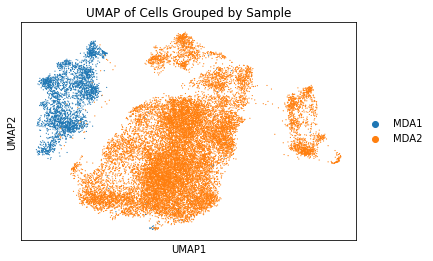

In [15]:
sc.pl.umap(adata, color='sample', title='UMAP of Cells Grouped by Sample')


/Users/bee/opt/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


2000 highly variable genes found


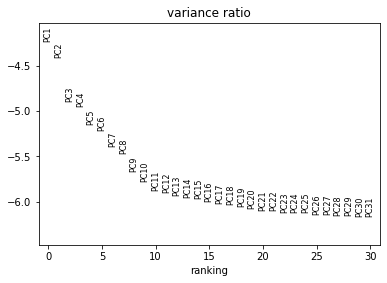

/Users/bee/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/bee/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


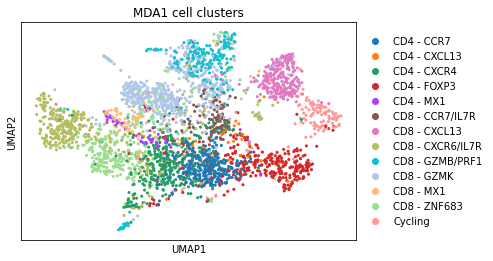

In [16]:
# Let's try this just for MDA1

import scanpy as sc

# Normalize total counts per cell
sc.pp.normalize_total(adata_MDA1, target_sum=1e4)  # scale counts so total = 10,000 per cell

# Logarithmize
sc.pp.log1p(adata_MDA1)  # log(x+1) transformation

# Identify highly variable genes HVGs: HVGs capture most of the biological signal.
sc.pp.highly_variable_genes(adata_MDA1, flavor='seurat', n_top_genes=2000)
print(adata_MDA1.var['highly_variable'].sum(), "highly variable genes found")

# Filter down to HVGs for PCA
adata_MDA1_hvg = adata_MDA1[:, adata_MDA1.var['highly_variable']].copy()

# Scale the data
sc.pp.scale(adata_MDA1_hvg, max_value=10)

# PCA
sc.tl.pca(adata_MDA1_hvg, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_MDA1_hvg, log=True, show=True)

# Neighborhood Graph
sc.pp.neighbors(adata_MDA1_hvg, n_neighbors=15, n_pcs=30)  # adjust PCs as needed

# UMAP
sc.tl.umap(adata_MDA1_hvg)
sc.pl.umap(adata_MDA1_hvg, color=['cluster'], title='MDA1 cell clusters')

/Users/bee/opt/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


2000 highly variable genes found


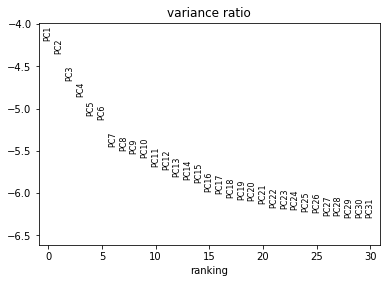

/Users/bee/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/bee/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


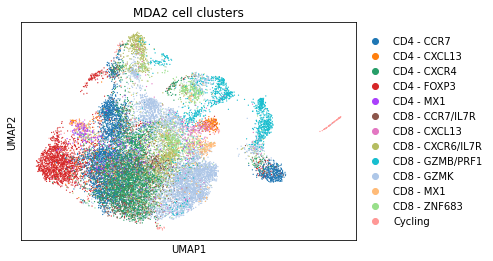

In [18]:
# Let's try this just for MDA2

import scanpy as sc

# Normalize total counts per cell
sc.pp.normalize_total(adata_MDA2, target_sum=1e4)  # scale counts so total = 10,000 per cell

# Logarithmize
sc.pp.log1p(adata_MDA2)  # log(x+1) transformation

# Identify highly variable genes HVGs: HVGs capture most of the biological signal.
sc.pp.highly_variable_genes(adata_MDA2, flavor='seurat', n_top_genes=2000)
print(adata_MDA2.var['highly_variable'].sum(), "highly variable genes found")

# Filter down to HVGs for PCA
adata_MDA2_hvg = adata_MDA2[:, adata_MDA2.var['highly_variable']].copy()

# Scale the data
sc.pp.scale(adata_MDA2_hvg, max_value=10)

# PCA
sc.tl.pca(adata_MDA2_hvg, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_MDA2_hvg, log=True, show=True)

# Neighborhood Graph
sc.pp.neighbors(adata_MDA2_hvg, n_neighbors=15, n_pcs=30)  # adjust PCs as needed

# UMAP
sc.tl.umap(adata_MDA2_hvg)
sc.pl.umap(adata_MDA2_hvg, color=['cluster'], title='MDA2 cell clusters')